In [2]:
import pandas as pd
import numpy as np
import random
import os

train_df = pd.read_csv('E:\data\kaggle_tabular/train.csv')
test_df = pd.read_csv('E:\data\kaggle_tabular/test.csv')
submission = pd.read_csv('E:\data\kaggle_tabular/sample_submission.csv')

# train.csv

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


결측값 채워야 함 : Age, Ticket, Fare, Cabin, Embarked    
데이터 자르기 : name (first name 혹은 second name만 사용하면 될 듯)

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [23]:
train_df.groupby(['Survived']).count() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,57226,57226,57226,57226,55290,57226,57226,55016,57153,12577,57098
1,42774,42774,42774,42774,41418,42774,42774,40361,42713,19557,42652


In [24]:
train_df.groupby(['Survived', 'Sex'])[['PassengerId']].count()

PassengerId
Survived Sex                
0        female        12660
         male          44566
1        female        31226
         male          11548

여성 생존율이 남성보다 높다.

In [26]:
train_df.groupby(['Survived', 'Pclass'])[['PassengerId']].count()

PassengerId
Survived Pclass             
0        1             12739
         2             13622
         3             30865
1        1             17576
         2             15057
         3             10141

1클래스 생존율이 가장 높고, 3클래스 생존율이 가장 낮다.

<AxesSubplot:xlabel='age_group'>

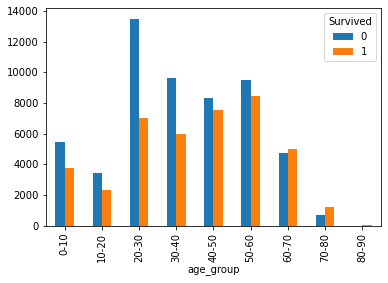

In [33]:
train_df['age_group'] = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).map(lambda x: f'{x.left}-{x.right}')
pd.crosstab(train_df['age_group'], train_df['Survived']).plot(kind='bar')

In [34]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0-10
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,10-20
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,60-70
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,60-70
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,30-40
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,50-60


# test.csv

In [36]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96513.000000,100000.000000,100000.00000,99867.000000
mean,149999.500000,2.368930,30.565796,0.486550,0.49283,45.374804
std,28867.657797,0.878458,14.054634,0.771262,0.92360,65.204725
min,100000.000000,1.000000,0.080000,0.000000,0.00000,0.050000
25%,124999.750000,1.000000,21.000000,0.000000,0.00000,10.130000
50%,149999.500000,3.000000,27.000000,0.000000,0.00000,13.980000
75%,174999.250000,3.000000,40.000000,1.000000,1.00000,37.390000
max,199999.000000,3.000000,81.000000,8.000000,9.00000,680.700000


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96513 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       94819 non-null   object 
 8   Fare         99867 non-null   float64
 9   Cabin        29169 non-null   object 
 10  Embarked     99723 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


In [ ]:
test_df.

# submission.csv

In [5]:
submission

,PassengerId,Survived
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
99995,199995,1
99996,199996,1
99997,199997,1
99998,199998,1
